# **Bar Plot Visualization with Seaborn**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
percentage_people_below_poverty_level = pd.read_csv("/content/drive/MyDrive/data/PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252") 
percent_over_25_completed_highSchool = pd.read_csv("/content/drive/MyDrive/data/PercentOver25CompletedHighSchool.csv", encoding="windows-1252") 
share_race_city = pd.read_csv("/content/drive/MyDrive/data/ShareRaceByCity.csv", encoding="windows-1252") 
kill = pd.read_csv("/content/drive/MyDrive/data/PoliceKillingsUS.csv", encoding="windows-1252") 

**Eyaletlerin Fakirlik Oranı**

Her bir eyaletin fakirlik oranını bulmak için unique eyaletlerin bulunması gerekir.

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True) #poverty_rate sütunundaki '-' değerler 0 ile değiştirildi.
                                                                                     #inplace=True olması bu işlemin kalıcı olduğu anlamına gelir.

In [5]:
percentage_people_below_poverty_level.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
#poverty_rate sütununun değerleri stringdir, floata çevrilir.

In [7]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
#Geographic Area sütunundaki unique değerler bulunur, bu değerler liste olarak bir değişkene aktarılır.
#bu sütun eyaletleri barındırdığından hangi eyaletler var, anlaşılmış olur.

In [8]:
percentage_people_below_poverty_level['Geographic Area'].unique()  #burada da bu unique eyaletler gözükür.

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [9]:
len(percentage_people_below_poverty_level['Geographic Area'].unique()) #unique eyaletlerin sayısı 51 tanedir.

51

In [10]:
area_poverty_ratio = []  #eyaletlerin sıralama yapılarak bar plot'a koyulması gerekir.
                         #böylelikle eyaletlerin poverty_rate yoğunluklarına göre bir çizim gerçekleştirilir.
                         #eğer bu sıralama yapılmazsa listede gözüktüğü gibi 'AL', 'AK' şeklinde teker teker çizilir.
                         #bunun için boş bir liste oluşturulup sıralanan değerler bu listeye eklenir.

In [11]:
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i] #unique eyaletler bulunur.
    area_poverty_rate = sum(x.poverty_rate)/len(x)  #poverty_rate sütununun unique eyaletlere göre ortalaması alınır ve bir değişkende tutulur.
    area_poverty_ratio.append(area_poverty_rate)    #değişkendeki değerler listeye eklenir.

In [12]:
area_poverty_rate #ortalama fakirlik oranı

9.063725490196083

In [13]:
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
#bu oluşturulan dataframede arae_listte unique eyaletlerin tutulduğu sütundur..
#area_poverty_ratio eyaletteki fakirlik oranıdır.

In [15]:
data.head(10) #eyaletlere göre fakirlik oranı

,area_list,area_poverty_ratio
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371
5,CO,13.187773
6,CT,9.137500
7,DE,12.555844
8,DC,18.000000
9,FL,17.508606


In [16]:
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values 
#area_poverty_ratio'da tutulan değerler ascending=False olduğu için azalan değerde sıralanır.

In [17]:
sorted_data = data.reindex(new_index) #azalan sıradaki değerler datanın indeksi yapıldı

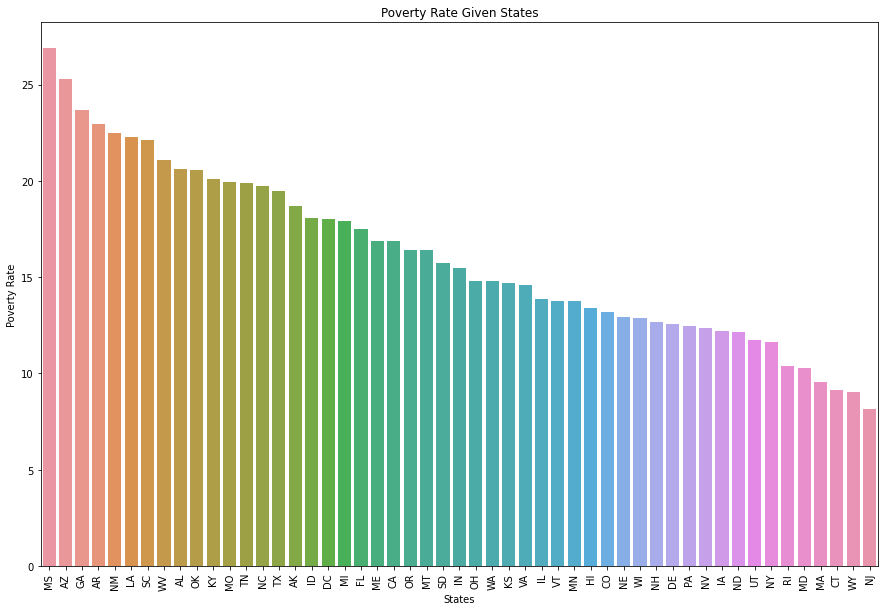

In [18]:
plt.figure(figsize=(15,10)) #plt yeni bir figür açmak için kullanılır, görselleştirme seaborn ile yapılır.
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio']) #x ekseninde unique eyaletler,y ekseninde eyaletlere göre fakirlik oranı tutulur.
plt.xticks(rotation= 90) #x ekseninde yazan eyalet isimleri 90 derecelik açıyla yazılır, 45 derece olsaydı çapraz şekilde yazılacaktı.
plt.xlabel('States')   #x ekseninin adı
plt.ylabel('Poverty Rate')  #y ekseninin adı
plt.title('Poverty Rate Given States')  #figürün adı
plt.show()

Bu bar plota bakılarak;

*   En yüksek fakirlik oranının Mississippi eyaletinde, en düşük fakirlik oranının ise New Jersey eyaletinde olduğu anlaşılır.
*   New York eyaletinin fakirlik oranının 12-13 olduğu anlaşılır, ortalamadan biraz fazladır.



**Polislerin Öldürdüğü İnsanların İsim ya da Soy İsimlerinden En Çok Bulunan 15 Tanesi**

PoliceKillingsUS datası kullanılarak polislerin öldürdüğü insanların isimleri ya da soy isimlerinden dataframede en çok bulunan 15 tanesinin ile bir bar plot görselleştirmesi yapılmak amaçlanmaktadır.

In [19]:
kill.head() #manner_of_death -> nasıl öldürüldüğü
            #armed -> hangi silahla öldürüldüğü
            #signs_of_mental_illness -> akıl hastalığının olduğunun işareti, bu sütun boolean değer barındırır.
            #threat_level -> saldırı türü
            #flee -> öldürülen insanın kaçıp kaçmadığının bilgisi

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [20]:
kill.name.value_counts()  #öldürülen insanlardan 'TK TK' nın gerçek bir isim olmadığı düşünülmektedir.
                          #49 kişinin adı 'TK TK' olamaz ve kimliği tespit edilemeyen insanlara verilen bir değer olduğu varsayılır.
                          #burada yapılacak görselleştirme isim soyisme göre yapılacağından bu verinin atılması gerekir.

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [21]:
separate = kill.name[kill.name != 'TK TK'].str.split()  #name sütunundaki 'TK TK' değeri hariç isim ve soyisimler ayrılır.

In [22]:
a,b = zip(*separate) #burada yapılan unzip işlemiyle isimler ve soyisimler a ve b olmak üzere ayrı ayrı değişkenlerde tutulur.

In [23]:
name_list = a+b #ayrılan isim ve soyisimler bir tuple içerisinde depolanır.

In [24]:
from collections import Counter
name_count = Counter(name_list) #hangi isim ve soyisimden kaç tane olduğu tespit edilir.

In [26]:
most_common_names = name_count.most_common(15) #name count değişkeninde tutulan isim ve soyisimlerden en çok bulunan 15 tanesi tespit edilir.

In [27]:
most_common_names #öldürülen insanların isim ya da soy isimlerinden datasette en çok bulunan 15 tanesi 

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [28]:
x,y = zip(*most_common_names) #en çok bulunan 15 isim ya da soyisim x,y değişkenlerine ziplenir. 
x,y = list(x),list(y)         #ziplenen değişkenler listeye dönüştürülür.

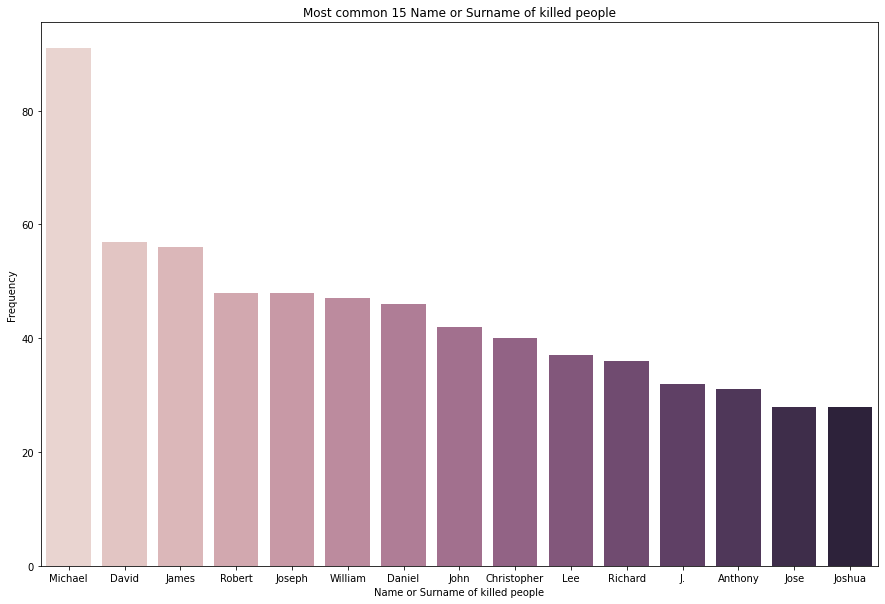

In [29]:
plt.figure(figsize=(15,10)) #figür oluşturulup, boyutu ayarlandı.
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x))) #cubehelix_palette methodu ile ismin yoğunluğuna göre bir renk belirlenir.
plt.xlabel('Name or Surname of killed people') #x ekseninin adı
plt.ylabel('Frequency')  #y ekseninin adı
plt.title('Most common 15 Name or Surname of killed people') #figürün adı
plt.show()

İsim soy isim değerlendirmesinde en fazla bulunan isim Michael, en az bulunan isim Joshua'dır.

x ekseni isim ya da soy isimleri, y ekseni de sıklıklarını verir.

# **25 Yaşından Büyük İnsanların Eyaletlere göre Liseden Mezun Olma Oranı**

Eyaletlerdeki 25 yaşından büyük insanların liseden mezun olma oranını bar plot ile görselleştirmek amaçlanmaktadır.

In [30]:
percent_over_25_completed_highSchool.head() #Geographic Area -> eyalet
                                            #City -> şehir
                                            #percent_completed_hs -> liseyi bitirenlerin yüzdesini verir.

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [31]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
                                                  #percent_completed_hs sütunundaki '-' değerler 0.0 ile değiştirildi.

In [32]:
 percent_over_25_completed_highSchool.info()  #percent_completed_hs sütunundaki verilerin türü object
                                              #bu verilerle sayısal bir kıyaslama yapabilmek için sayısal bir değere dönüştürülmesi lazımdır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [33]:
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
                                                            #percent_completed_hs sütunundaki veriler floata dönüştürüldü.

In [34]:
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique()) 
                                  #Geographic Area sütunu eyaletleri barındırır.
                                  #unique eyaletler bir liste içerisinde depolanıp area_list değişkenine aktarılır.

In [35]:
percent_over_25_completed_highSchool['Geographic Area'].unique() #Geographic Area sütunundaki unique eyaletler gözükür.

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [36]:
area_highschool = [] #boş bir liste yaratılır. 

In [37]:
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i] #unique eyaletler bulunur.
    area_highschool_rate = sum(x.percent_completed_hs)/len(x) #unique eyaletlere göre liseyi bitirme oranı bulunur.
    area_highschool.append(area_highschool_rate) #bu oran liste içerisine eklenir.

In [38]:
area_highschool_rate #liseyi tamamlayanların oranı gözükmektedir.

83.97401960784312

In [39]:
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
#bu dataframede area_list unique eyaletlerin tutulduğu sütundur.
#area_highschool_ratio eyalette liseden mezun olanların oranıdır.

In [40]:
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
#area_highschool_ratio sütunundaki değerler ascending=True olduğundan artan şekilde sıralanır.

In [41]:
sorted_data2 = data.reindex(new_index) #artan sıralamadaki değer dataframe'in yeni indeksi olur.

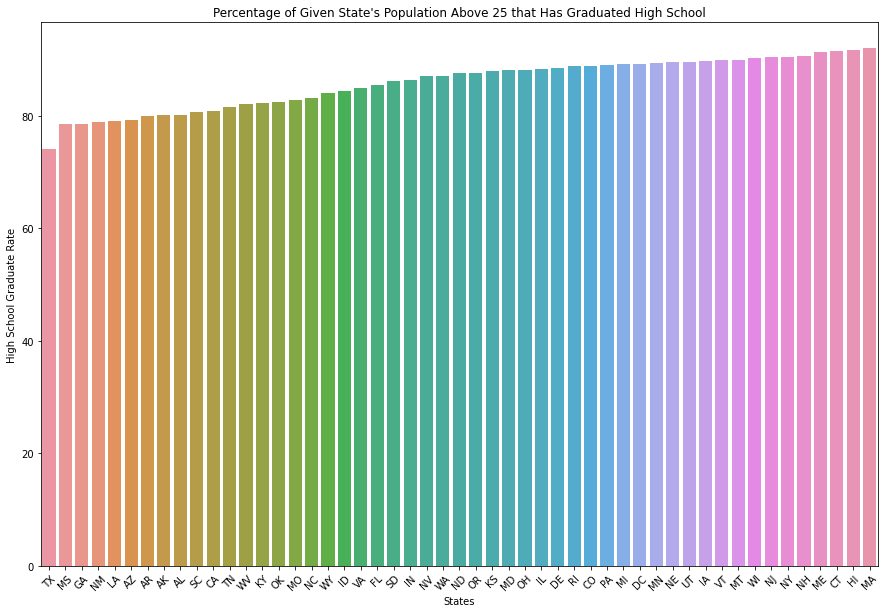

In [42]:
plt.figure(figsize=(15,10))  #figür oluşturuldu.
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio']) #x ekseni unique eyaletler, y ekseni liseden mezun olma oranı yapıldı.
plt.xticks(rotation= 45) #eyalet isimleri 45 derecelik açıyla yazıldı.
plt.xlabel('States') #x eksenine isim verildi.
plt.ylabel('High School Graduate Rate') #y eksenine isim verildi.
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School") #figürün başlığı oluşturuldu.
plt.show()

En düşük mezun olma oranı Texas(TX) eyaletinde, en yüksek mezun olma oranı Massachusetts(MA) eyaletindedir.

# **Yatay Bar Plot**

**Eyaletlerdeki Irk Oranı**

share_race_city datasında eyaletler, bu eyaletlerdeki şehirler ve her eyaletteki ırkların oranı ayrı ayrı bulunmaktadır.

Bu data incelenerek her eyaletteki ırk oranlarının görselleştirilmesi amaçlanmaktadır.

In [43]:
share_race_city.head() 

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [44]:
share_race_city.replace(['-'],0.0,inplace = True) #share_race_city datasında bazı bozuk değerler bulunmaktadır.
share_race_city.replace(['(X)'],0.0,inplace = True)  #datada bulunan '-' be '(X) değerleri 0'a eşitlenir.

In [45]:
share_race_city.info() #datada ırkların bulundurduğu verilerin türü stringdir.
                       #oranlar arasında analiz yapabilmek için sayısal değere çevrilmelidir.
                       #bu veriler bir oran olduğu için float'a çevrilmelidir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [46]:
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
#share_race_city verisindeki ırklar float'a çevrildi.

In [47]:
area_list = list(share_race_city['Geographic area'].unique()) #datadaki unique eyaletler bulunur.

In [48]:
share_race_city['Geographic area'].unique() #Amerika'daki eyaletler

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [49]:
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []          #her ırk için ayrı bir liste oluşturulur.

In [50]:
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))                 #unique eyaletlerdeki ırkların oranı teker teker hesaplanır.

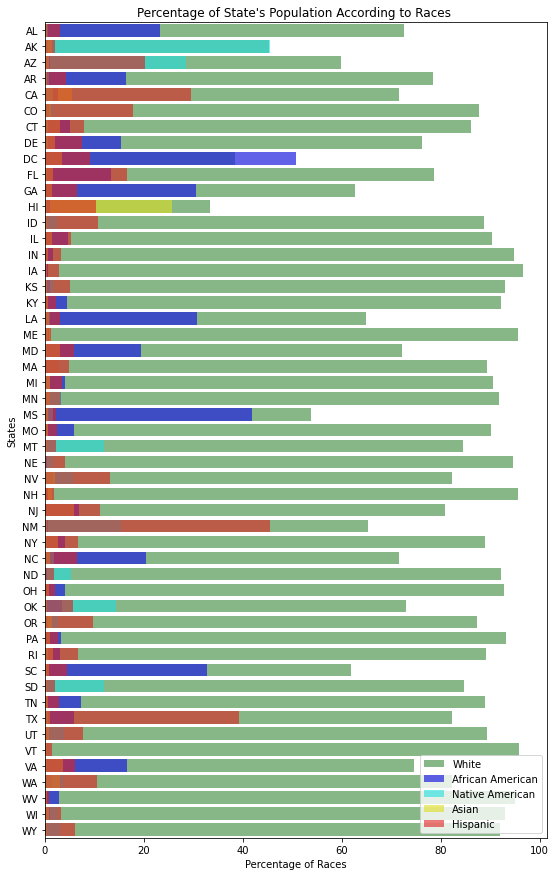

In [51]:
f,ax = plt.subplots(figsize = (9,15)) #figür oluşturuldu.

#share_rate değişkeninde bulunan beyazların oranı x değişkeninde tutulur.
#y ekseninde unique eyaletler tutulur.
#rengi yeşil, saydamlığı 0.5 olarak ayarlanır.
#bu işlemler tüm ırklar için yapılır.
#hepsine farklı renkler atanır.
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' ) 
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     #legend ile labelların konumu belirlendi.
                                                #bir konum belirlenmezse default olarak en uygun yere koyulur.
                                                #frameon=True olduğunda labelların görünür olması için bir arkaplan oluşturulur.
                                                #frameon yazılmazsa default olarak True atanır.
                                                #frameon=False yazılırsa labelların arkaplanı olmaz.
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")
#x, y eksenleri ve başlığın adı tek bir satırda tanımlanmıştır.
plt.show()